## 简述

本数据集来自互联网，是电商相关数据。

本数据包括以下字段：

- id：字段ID

- orderId：订单 ID

- userId：用户 ID

- productId：产品 ID

- cityId：城市 ID

- price：产品价格

- payMoney：支付额

- channelId：渠道 ID

- deviceType：设备类型

- createTime：下单时间

- payTime：支付时间

### 分析目的

本次分析的目的如下：
- 商品销售量的前十位和后十位


- 商品总销售额的前十位和后十位


- 查看销售量和销售额最后 100 个的交集，判断是否下架某些商品


- 查看价格和销售量之间的关系分布图


- 下单时间分布


- 下单时间与付款时间差


- 查看月、周、日成交额（下单数）

## 数据分析

In [1]:
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt

raw_data = pd.read_csv("../20191019_ordersInfo.csv")

In [2]:
print(raw_data.info())
raw_data.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 104557 entries, 0 to 104556
Data columns (total 11 columns):
id            104557 non-null int64
orderId       104557 non-null int64
userId        104557 non-null int64
productId     104557 non-null int64
cityId        104557 non-null int64
price         104557 non-null int64
payMoney      104557 non-null int64
channelId     104549 non-null object
deviceType    104557 non-null int64
createTime    104557 non-null object
payTime       104557 non-null object
dtypes: int64(8), object(3)
memory usage: 8.8+ MB
None


,id,orderId,userId,productId,cityId,price,payMoney,channelId,deviceType,createTime,payTime
0,1,232148841,2794924,268,110001,35300,35300,9058255c90,3,2016-01-01 12:53:02,2016-01-01 12:53:24
1,2,222298971,1664684,801,330001,51200,49900,e0e6019897,2,2016-01-01 21:42:51,2016-01-01 21:43:30
2,3,211494392,2669372,934,220002,62100,62100,9058255c90,3,2016-01-01 14:10:13,2016-01-01 14:11:18
3,4,334575272,1924727,422,230001,50600,42000,46d5cea30d,2,2016-01-01 17:43:35,2016-01-01 17:43:53
4,5,144825651,4148671,473,130006,149100,142000,6ff1752b69,2,2016-01-01 18:52:04,2016-01-01 18:52:47


初步观察：createTime、payTime 列可能需要转换成时间类型，其余可暂不做处理。为了省时间，暂时不作处理，等需要用到这两个字段的数据时再做处理。

### 数据预处理

数据预览。

In [3]:
print(raw_data.info())
raw_data.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 104557 entries, 0 to 104556
Data columns (total 11 columns):
id            104557 non-null int64
orderId       104557 non-null int64
userId        104557 non-null int64
productId     104557 non-null int64
cityId        104557 non-null int64
price         104557 non-null int64
payMoney      104557 non-null int64
channelId     104549 non-null object
deviceType    104557 non-null int64
createTime    104557 non-null object
payTime       104557 non-null object
dtypes: int64(8), object(3)
memory usage: 8.8+ MB
None


,id,orderId,userId,productId,cityId,price,payMoney,deviceType
count,104557.000000,1.045570e+05,1.045570e+05,104557.000000,104557.000000,1.045570e+05,1.045570e+05,104557.000000
mean,52279.000000,2.993341e+08,3.270527e+06,504.566275,154410.947225,9.167350e+04,8.686689e+04,2.385292
std,30183.150385,5.149818e+07,4.138208e+07,288.130647,72197.163762,9.158836e+04,9.072028e+04,0.648472
min,1.000000,1.035627e+08,2.930600e+04,0.000000,30000.000000,6.000000e+02,-1.000000e+03,1.000000
25%,26140.000000,2.633627e+08,2.179538e+06,254.000000,100011.000000,3.790000e+04,3.360000e+04,2.000000
50%,52279.000000,2.989828e+08,2.705995e+06,507.000000,150001.000000,5.920000e+04,5.500000e+04,2.000000
75%,78418.000000,3.349972e+08,3.271237e+06,758.000000,220002.000000,1.080000e+05,1.040000e+05,3.000000
max,104557.000000,4.871430e+08,3.072939e+09,1000.000000,380001.000000,2.295600e+06,2.294200e+06,6.000000


初步显示：chanelId 比预计值多两个数据，各列似乎都不存在空值。

#### 缺失值处理

查找缺失值。

In [4]:
raw_data[raw_data.isnull().any(axis=1)].head()

,id,orderId,userId,productId,cityId,price,payMoney,channelId,deviceType,createTime,payTime
19085,19086,284008366,3309847,698,240001,216400,204000,NaN,2,2016-03-08 22:36:12,2016-03-08 22:36:50
38174,38175,287706890,2799815,823,70001,76000,74900,NaN,3,2016-06-10 22:30:18,2016-06-10 22:30:47
48072,48073,248057459,3970570,142,130001,47400,40000,NaN,2,2016-03-30 12:59:03,2016-03-30 12:59:13
75948,75949,266847859,3761925,649,120006,25700,25700,NaN,2,2016-08-19 08:46:22,2016-08-19 08:46:39
100951,100952,283627429,4156620,269,280001,48400,41000,NaN,2,2016-12-13 13:24:37,2016-12-13 14:47:08


处理缺失值：由于缺失值数量过少，且缺乏其他数据，此处将有缺失值的数据直接删除。

In [5]:
raw_data.drop(index=raw_data[raw_data.channelId.isna()].index,inplace=True)

In [6]:
raw_data[raw_data.isnull().any(axis=1)].head()

,id,orderId,userId,productId,cityId,price,payMoney,channelId,deviceType,createTime,payTime


缺失值处理完毕。

#### 异常值处理

“异常值”就是不符合预期或设定的值。根据对数据的了解，id、orderId 都必须唯一，而其他列的值都不可能为负值。依此进行检验。

又由于重复值处理一般都放在数据预处理的最后，因此，先检验是否存在负值的列。

In [7]:
import qgrid
qgrid.set_grid_option('maxVisibleRows', 10)
q = qgrid.show_grid(raw_data)
q

QgridWidget(grid_options={'fullWidthRows': True, 'syncColumnCellResize': True, 'forceFitColumns': True, 'defau…

使用该工具检验后发现：
- productId 存在值为 0 的数据；
- payMoney 存在负值。

此处存在 productId 为 0 的数据，由于没有相关数据，暂时无法了解这其中的原因，也无法深究，因此，只能选择删除这些数据。而 payMoney 也不可能为负值，同样由于缺乏业务环境，无法得知出现负值的原因，只能选择删除含有负值的数据。

In [9]:
raw_data.drop(index=raw_data[raw_data.productId <= 0].index,inplace=True)
raw_data.drop(index=raw_data[raw_data.payMoney <= 0].index,inplace=True)

#### 重复值处理

In [10]:
print("id 重复的数据有： \n", raw_data[raw_data.id.duplicated()])
print("orderId 重复的数据有： \n", raw_data[raw_data.orderId.duplicated()])

id 重复的数据有： 
 Empty DataFrame
Columns: [id, orderId, userId, productId, cityId, price, payMoney, channelId, deviceType, createTime, payTime]
Index: []
orderId 重复的数据有： 
             id    orderId   userId  productId  cityId   price  payMoney  \
8970      8971  212049970  3330743        642  100010  293300    291000   
28427    28428  237885771  3263206        103  130001  176900    176900   
48138    48139  290486736  2750935        408  210004   77800     75000   
55326    55327  292269570  4502557         20  120006   10800      6000   
56105    56106  310580133  3872156        365  230001   55200     27100   
62216    62217  292985874  3145930        287  160009  301500    269000   
68977    68978  335579842  3930470        896  180005   73000     72000   
69222    69223  363751241  3742725        926  220011  296400    296000   
71880    71881  336409807  3380334        364  220005  245800    226000   
80943    80944  294553721  2510214        722  180001   41900     38000   
85850  

由于数据集比较大，而重复值的数量较少，且缺乏其他条件，因此选择删除重复值。

In [11]:
raw_data.orderId.drop_duplicates(inplace=True)

检验 orderId 字段的重复值是否成功处理。

In [12]:
raw_data.orderId.unique().size - raw_data.orderId.size

0

orderId 重复值处理完毕。

### 分析数据

使用相关工具预览数据。

In [13]:
import pandas_profiling

pandas_profiling.ProfileReport(raw_data)

####    商品销售量的前十位和后十位

In [22]:
productId_orderCount = raw_data.groupby(by="productId").count()['orderId'].sort_values(ascending=False)

商品销售量前十位的产品 id：

In [19]:
productId_orderCount.head(10)

productId
895    354
762    350
103    335
587    303
60     302
385    301
38     301
403    297
345    292
823    288
Name: orderId, dtype: int64

商品销售量后十位的产品 id：

In [21]:
productId_orderCount.tail(10)

productId
948     29
856     28
621     27
272     26
563     24
347     21
468     18
597     18
986     16
1000    13
Name: orderId, dtype: int64

#### 商品总销售额的前十位和后十位

In [23]:
productId_orderSum = raw_data.groupby(by="productId").count()['payMoney'].sort_values(ascending=False)

商品总销售额的前十位的产品 id：

In [25]:
productId_orderSum.head(10)

productId
895    354
762    350
103    335
587    303
60     302
385    301
38     301
403    297
345    292
823    288
Name: payMoney, dtype: int64

商品总销售额的后十位的产品 id：

In [26]:
productId_orderSum.tail(10)

productId
948     29
856     28
621     27
272     26
563     24
347     21
468     18
597     18
986     16
1000    13
Name: payMoney, dtype: int64

后十位的产品 id 与商品销售量后十位的产品 id 完全重复，因此，我们可以来看下销售量和销售额最后 100 位的交集，看看是否要下架某些商品。如果使用可视化来做分析，那么，使用散点图会是不错的选择。

#### 查看销售量和销售额最后 100 个的交集，判断是否下架某些商品

In [31]:
productId_orderCount.tail(100).index.intersection(productId_orderSum.tail(100).index).size

100

返回的数量为 100，那就意味着全部相同。此时可以去分析这些产品销售量低下的原因，避免日后再出现相似的情形。

####    查看价格和销售量之间的关系分布图

使用`cut()`方法对 price 分桶，而后绘制分布图，使用直方图展示。

(array([9.8700e+02, 7.0360e+03, 9.9650e+03, 1.0750e+04, 1.4767e+04,
        9.2520e+03, 8.7730e+03, 7.1370e+03, 2.8590e+03, 3.2110e+03,
        4.7370e+03, 1.8420e+03, 1.1780e+03, 1.8610e+03, 1.6450e+03,
        5.8700e+02, 1.7750e+03, 2.2180e+03, 6.6800e+02, 1.8010e+03,
        2.8160e+03, 6.4000e+02, 2.8400e+02, 2.8200e+02, 4.7300e+02,
        1.9600e+02, 7.0300e+02, 8.2200e+02, 1.8300e+02, 7.3600e+02,
        1.1980e+03, 2.5600e+02, 1.0300e+02, 1.2000e+02, 1.0700e+02,
        4.1000e+01, 1.0600e+02, 2.1400e+02, 9.0000e+01, 3.6000e+02,
        5.0700e+02, 9.9000e+01, 6.8000e+01, 2.4000e+01, 3.0000e+01,
        1.2000e+01, 5.2000e+01, 4.5000e+01, 1.5000e+01, 6.6000e+01,
        1.5300e+02, 5.0000e+01, 1.6000e+01, 2.2000e+01, 1.7000e+01,
        1.0000e+00, 2.2000e+01, 1.0000e+01, 1.0000e+01, 4.0000e+01,
        4.8000e+01, 1.6000e+01, 7.0000e+00, 1.1000e+01, 2.0000e+00,
        6.0000e+00, 3.0000e+00, 4.7000e+01, 6.0000e+00, 2.8000e+01,
        3.2000e+01, 6.0000e+00, 3.0000e+00, 0.00

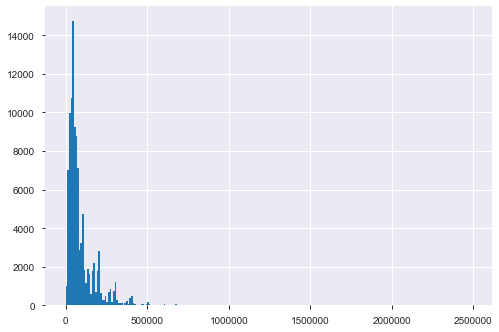

In [40]:
bins = np.arange(0, 2500000, 10000)
pd.cut(raw_data.price, bins).value_counts()
plt.hist(raw_data['price'], bins)

####    下单时间分布

首先对 createTime、payTime 两个字段做数据类型转化。

In [47]:
raw_data.createTime = pd.to_datetime(raw_data.createTime)
raw_data.payTime = pd.to_datetime(raw_data.payTime)

转换之后对时间分布进行分析。

分析方向有这么几个：
- 按小时分布，看看每天哪些时间点的下单人数最多；


- 按天分布，看看一般是哪些天的下单数量比较集中，是否存在周期性；

首先按小时分布。

orderHour
13    13230
14    10601
12     9681
20     9484
19     8368
21     7541
15     6595
11     5458
22     5411
18     5332
16     4566
17     4271
10     3589
23     3548
9      2113
0      1720
8      1046
1       660
7       459
2       257
6       176
3       125
5        67
4        51
Name: orderId, dtype: int64


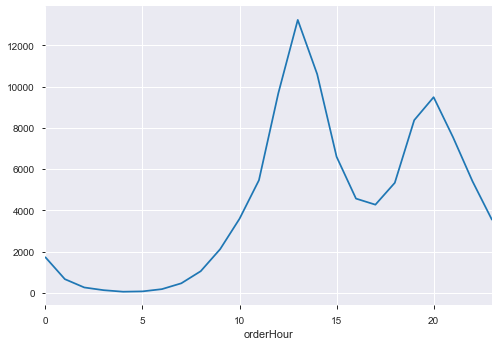

In [55]:
raw_data['orderHour'] = raw_data.createTime.dt.hour

print(raw_data.groupby(by="orderHour").count()['orderId'].sort_values(ascending=False))

raw_data.groupby(by="orderHour").count()['orderId'].plot()

在一天中，基本都是 11 点到 14 点、19 点到 21 点下单人数最多，而 13 点和 20 点都是两个时间段里面的高峰期。这也符合预期，因为这两个时间段都是工作休息期。因此，在这两个时间段，可能相关工作人员多加需要注意。 

接下来，按天分布。

orderWeek
5    19499
6    16931
4    16199
3    13796
2    12934
0    12506
1    12484
Name: orderId, dtype: int64


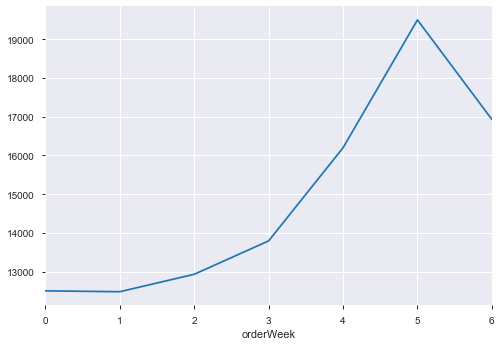

In [62]:
raw_data["orderWeek"] = raw_data["createTime"].dt.dayofweek
print(raw_data.groupby(by="orderWeek").count()['orderId'].sort_values(ascending=False))
raw_data.groupby(by="orderWeek").count()['orderId'].plot()

由于 Pandas 的机制，0 代表周一，其他依次往后推。因此，可以显然了解到：周六的下单数量最多。估计与周六是休息日有关。

####    下单时间与付款时间差

(0, 60]              82505
(120, 600]            9811
(60, 120]             9797
(600, 1200]            876
(1200, 6000]           712
(12000, 60000]         154
(6000, 12000]          105
(120000, 600000]        72
(60000, 120000]         59
(600000, 1200000]       31
Name: diffTime, dtype: int64


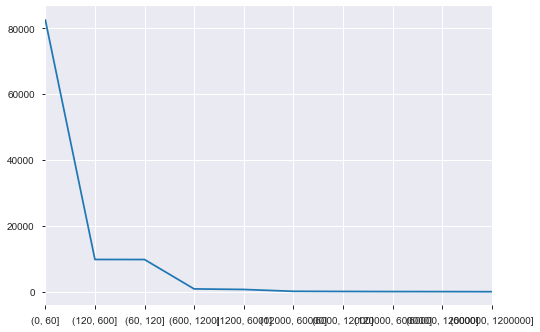

In [68]:
def get_seconds(x):
    return x.total_seconds()

raw_data["diffTime"] = (raw_data["payTime"] - raw_data["createTime"]).apply(get_seconds)

bins = [0, 60, 120, 600, 1200, 6000, 12000, 60000, 120000, 600000, 1200000]
print(pd.cut(raw_data.diffTime, bins=bins).value_counts(ascending=False))

pd.cut(raw_data.diffTime, bins=bins).value_counts().plot()

根据分析数据可知，绝大部分用户下单时间和付费时间相差不到 2 分钟，这意味着用户购买目的非常强。此时可以分析是否某些渠道推广发生作用还是因为其他原因，并可以趁此机会优化渠道推广，并弄明白那些推广效果差的渠道为何效果差。

####    查看月、周、日成交额（下单数）

此处可以用到 Pandas 里面的移动窗口函数`resample()`方法。但在使用之前，必须先把索引设置成时间索引。在此，把 createTime 设置为索引。

下面先按月查看成交额。

若是想查看周、日成交额，把“M”改成“W”、“D”即可查看相关的数据结果。

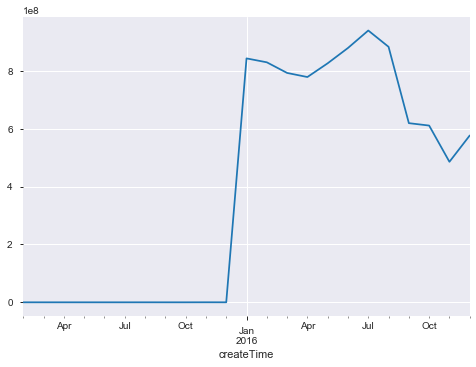

In [85]:
# raw_data.set_index("createTime", inplace=True)

monthOrders = raw_data.resample("M").sum()["payMoney"]

monthOrders.plot()